
# Building the HAFFA Logo

<svg>
<ellipse style="fill:#00ff00;stroke:#000000;" cx="50" cy="50" rx="48" ry="48">
<ellipse>
</svg>

<svg>
<ellipse style="fill:#00ff00;stroke:#000000;" cx="50" cy="50" rx="48" ry="48">
<ellipse>
</svg>

In [1]:
from IPython.display import SVG, display

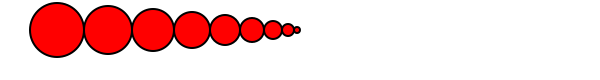

In [2]:
SVG('''<svg width="600" height="80">''' +
    ''.join([f'''<circle
              cx="{(30 + 3*i) * (10 - i)}"
              cy="30"
              r="{3. * float(i)}"
              fill="red"
              stroke-width="2"
              stroke="black">
        </circle>''' for i in range(10)]) +
    '''</svg>''')

In [3]:
import svgwrite

from svgwrite import cm, mm   


def basic_shapes(name):
    dwg = svgwrite.Drawing(filename=name, debug=True)
    hlines = dwg.add(dwg.g(id='hlines', stroke='green'))
    for y in range(20):
        hlines.add(dwg.line(start=(2*cm, (2+y)*cm), end=(18*cm, (2+y)*cm)))
    vlines = dwg.add(dwg.g(id='vline', stroke='blue'))
    for x in range(17):
        vlines.add(dwg.line(start=((2+x)*cm, 2*cm), end=((2+x)*cm, 21*cm)))
    shapes = dwg.add(dwg.g(id='shapes', fill='red'))

    # set presentation attributes at object creation as SVG-Attributes
    circle = dwg.circle(center=(15*cm, 8*cm), r='2.5cm', stroke='blue', stroke_width=3)
    circle['class'] = 'class1 class2'
    shapes.add(circle)

    # override the 'fill' attribute of the parent group 'shapes'
    shapes.add(dwg.rect(insert=(5*cm, 5*cm), size=(45*mm, 45*mm),
                        fill='blue', stroke='red', stroke_width=3))

    # or set presentation attributes by helper functions of the Presentation-Mixin
    ellipse = shapes.add(dwg.ellipse(center=(10*cm, 15*cm), r=('5cm', '10mm')))
    ellipse.fill('green', opacity=0.5).stroke('black', width=5).dasharray([20, 20])
    dwg.save()

In [4]:
basic_shapes('basic_shapes.svg')

In [5]:
SVG(filename="basic_shapes.svg")

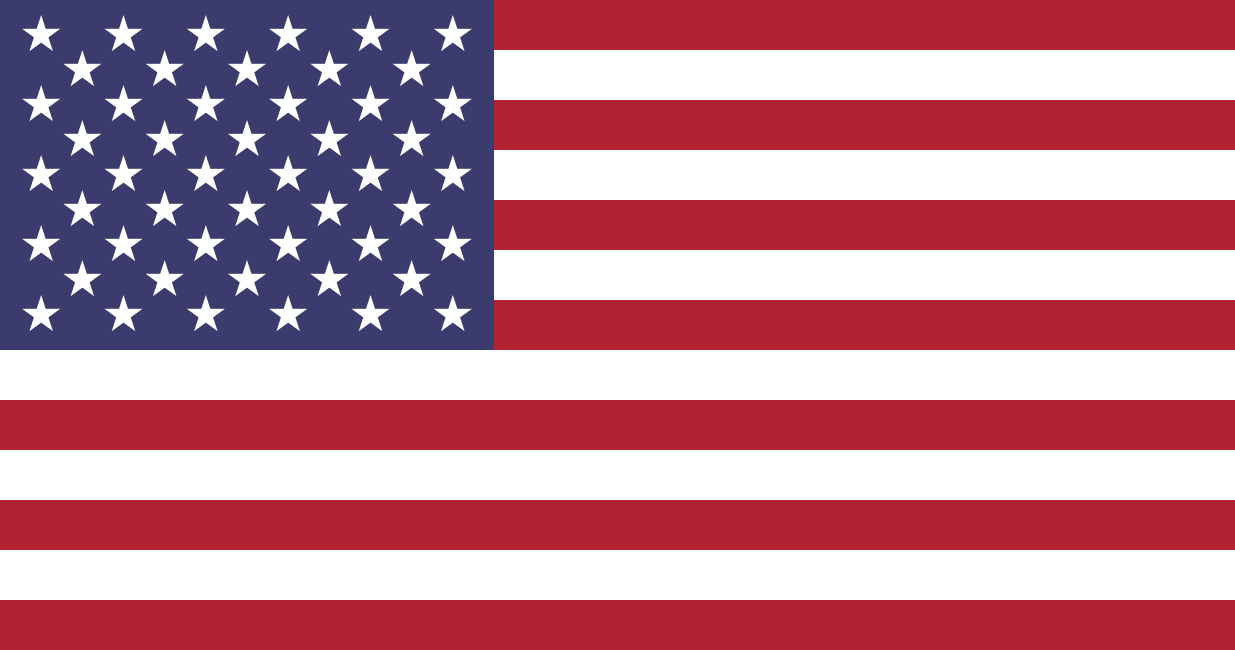

In [8]:
SVG(filename="usflag.svg")

In [7]:
import drawSvg as draw

d = draw.Drawing(200, 100, origin='center', displayInline=False)

# Draw an irregular polygon
d.append(draw.Lines(-80, -45,
                    70, -49,
                    95, 49,
                    -90, 40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
d.append(draw.Rectangle(0,0,40,50, fill='#1248ff'))

# Draw a circle
d.append(draw.Circle(-40, -10, 30,
            fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='green',
              fill='black', fill_opacity=0.5)
p.M(-30,5)  # Start path at point (-30, 5)
p.l(60,30)  # Draw line to (60, 30)
p.h(-70)    # Draw horizontal line to x=-70
p.Z()       # Draw line to start
d.append(p)

# Draw multiple circular arcs
d.append(draw.ArcLine(60,-20,20,60,270,
            stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60,-20,20,60,270,cw=False,
            stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60,-20,20,270,60,cw=True,
            stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.5, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, -0.5, -0.1, 0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
              marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, -40)
p.L(20, -27)
p.L(0, -20)
d.append(p)
d.append(draw.Line(30, -20, 0, -10,
            stroke='red', stroke_width=2, fill='none',
            marker_end=arrow))  # Add an arrow to the end of a line

d.setPixelScale(2)  # Set number of pixels per geometry unit
#d.setRenderSize(400,200)  # Alternative to setPixelScale
d.saveSvg('example.svg')
d.savePng('example.png')

# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [9]:
from IPython.display import display, SVG

def show_svg(svgs, width=1000, height=1000):
    SVG_HEAD = '''<?xml version="1.0" standalone="no"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">'''
    SVG_START = '''<svg width="{w:}px" height="{h:}px" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink= "http://www.w3.org/1999/xlink">'''
    SVG_END = '</svg>'
    return display(SVG(SVG_HEAD + SVG_START.format(w=width, h=height) + svgs + SVG_END))

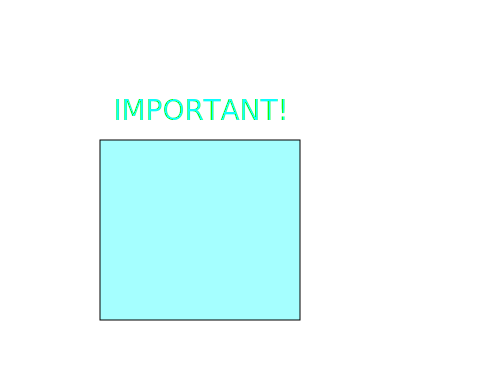

In [10]:
from random import random
w, h = 500, 390

def box(xy,wh,rgba=(50,50,50,1)):
    return '''<rect x="{}" y="{}" width="{}" height="{}" fill="rgba({:d},{:d},{:d},{:f})" stroke="rgb(0,0,0)" />
        '''.format(xy[0],xy[1], wh[0],wh[1], rgba[0],rgba[1],rgba[2],rgba[3])

svgs = ['<image xlink:href="static/biospace-news-biogen-idec-2.png" x="0" y="0" width="{:d}px" height="{:d}px"/>'.format(w,h)]
svgs += [box((100,140),(200,180), rgba=(0,255,255,.35))]
svgs += ['''<text x="{x:d}" y="{y:d}" text-anchor="middle" font-size="28" fill="rgba(0,255,255,.95)">
         IMPORTANT!</text>'''.format(x=200, y=120)]

show_svg(''.join(svgs), width=w, height=h)